## Kaggle Climate Change Challenge
**by Gireen Naidu October-2020 <br>**

### 1) Import Data

**a. Import Libraries <br>**

In [45]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix

**b. Import Data Files <br>**

In [46]:
train_df = pd.read_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\train.csv")
test_df = pd.read_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\test.csv")

In [47]:
#Check shape of train and test dataframes
train_df.shape, test_df.shape

((15819, 3), (10546, 2))

In [48]:
#increase the display size the of columns  
pd.options.display.max_colwidth = 200

In [49]:
#Check Columns and Data from train_df
train_df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [50]:
#Check Columns and Data from test_df
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


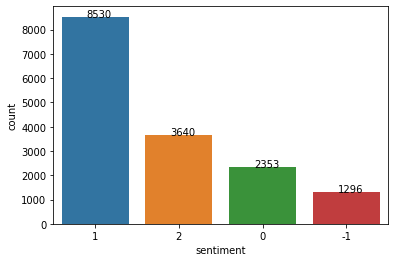

In [51]:
#checking sentiment distribution 
ax = sns.countplot(train_df["sentiment"], 
                   order = train_df["sentiment"].value_counts().index)

for p, label in zip(ax.patches, train_df["sentiment"].value_counts()):
    ax.annotate(label, (p.get_x()+0.300, p.get_height()+0.50))

In [52]:
# tmp_var created to later split full_df into train_df and test_df  
# Concatenate train_df and test_df to create full_df
tmp_var = train_df.shape[0]
test_df['sentiment'] = [np.nan] * test_df.shape[0]
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

### 2) Data Cleaning

In [53]:
# Importing HTMLParser to remove HTML tags
from html.parser import HTMLParser
html_parser = HTMLParser()
full_df['clean_message'] = full_df['message'].apply(lambda x: html_parser.unescape(x))

In [54]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [55]:
# remove twitter handles (@user)
full_df['clean_message'] = np.vectorize(remove_pattern)(full_df['clean_message'], "@[\w]*")

In [56]:
# Removing punctuations
full_df['clean_message'] = full_df['clean_message'].apply(lambda x: re.sub(r'[^\w\s]','',x))

In [57]:
#Convert message to lowercase
full_df['clean_message'] = full_df['clean_message'].apply(lambda x: x.lower())

In [58]:
#split train and test dataframes
y = full_df[:tmp_var]['sentiment']
df_train = full_df[:tmp_var]
df_test = full_df[tmp_var:]

In [59]:
# TfidfVectorizer with parameters
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True, 
                             min_df=2, 
                             max_df=0.9, 
                             ngram_range=(1, 2))
    vector.fit(train_fit)
    return vector

In [60]:
#Applying Vectorization on clean message and reshqping df
#tf_vector = get_feature_vector(np.array(df_train['clean_message'].iloc[:]).ravel())
#X = tf_vector.transform(np.array(df_train['clean_message'].iloc[:]).ravel())
#test_data = tf_vector.transform(np.array(df_test['clean_message'] .iloc[:]).ravel())

#Applying Vectorization on uncleaned message and reshqping df
tf_vector = get_feature_vector(np.array(df_train['message'].iloc[:]).ravel())
X = tf_vector.transform(np.array(df_train['message'].iloc[:]).ravel())
test_data = tf_vector.transform(np.array(df_test['message'] .iloc[:]).ravel())

### 3) Prediction Modelling

In [61]:
# Using uncleaned message improved F1 score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y,  random_state=0)

In [66]:
# Running LinearSVC Model 
LSVC_model = LinearSVC(C=0.70)
LSVC_model.fit(X_train, y_train)
y_predict_lr = LSVC_model.predict(X_test)
print(classification_report(y_test, y_predict_lr))
print("F1_SCORE - macro",round(f1_score(y_test, y_predict_lr, average="macro"),5))

              precision    recall  f1-score   support

        -1.0       0.78      0.52      0.63       130
         0.0       0.69      0.44      0.54       235
         1.0       0.79      0.90      0.84       853
         2.0       0.80      0.81      0.80       364

    accuracy                           0.78      1582
   macro avg       0.76      0.67      0.70      1582
weighted avg       0.78      0.78      0.77      1582

F1_SCORE - macro 0.70237


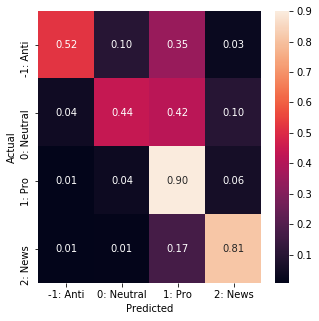

In [63]:
#Confusion Matrix Heatmap Normalised
labels = ['-1: Anti','0: Neutral', '1: Pro', '2: News']
cm = confusion_matrix(y_test, y_predict_lr)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f' , xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [64]:
# Kaggle Submission File 
y_pred = LSVC_model.predict(test_data).astype(int)
output = pd.DataFrame( data = {'tweetid': test_df['tweetid'], 'sentiment': y_pred })
output.to_csv(r"C:\Users\gnaidu\Downloads\Explore\Classification\Predict\Submission\Final_submission.csv", index = False)

### End of Notebook